In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r"C:\Users\Siddharth\Downloads\ipl.csv")
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
#2 Data Exploration checking shape and types of data
df.shape
df.dtypes
df.describe()


,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [4]:
#Data PreProcessing

df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [6]:
#Dropping Unwanted Columns
df=df.drop(['mid','venue','batsman','bowler','striker','non-striker'],axis=1,)


In [7]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


DATA PRE PROCESSING


In [8]:
#Filtering the consistent teams throughout
consistent_teams=[
    'Chennai Super Kings',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Delhi Daredevils',
    'Kings XI Punjab',
    'Rajasthan Royals',
    'Sunrisers Hyderabad'
]

df_filtered=df[
    (df['bat_team'].isin(consistent_teams))&
    (df['bowl_team'].isin(consistent_teams))
]

df_filtered=df_filtered[df_filtered['overs']>5]

In [9]:
#printing filtered data
df_filtered.head(10)

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222
37,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.6,58,1,222
38,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,62,1,6.1,55,1,222
39,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,63,1,6.2,52,1,222
40,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,64,1,6.3,47,1,222
41,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,66,1,6.4,45,1,222


3.2 FEATURE SELECTION

<Axes: >

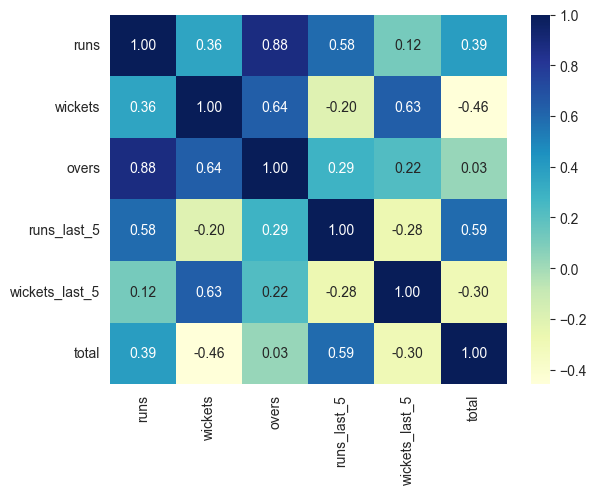

In [10]:
num_data=df_filtered.select_dtypes(['float64','int64'])
sns.heatmap(num_data.corr(),annot=True,cmap='YlGnBu',fmt='.2f')

In [11]:
#3.3 Encoding Categorical Features
#one hot encoding

print(df_filtered.columns)
df_filtered=pd.get_dummies(df_filtered,columns=['bat_team','bowl_team'])

Index(['date', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')


In [12]:
df_filtered.head(10)

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
33,2008-04-18,61,1,5.2,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34,2008-04-18,61,1,5.3,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
35,2008-04-18,61,1,5.4,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
36,2008-04-18,61,1,5.5,58,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
37,2008-04-18,61,1,5.6,58,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
38,2008-04-18,62,1,6.1,55,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
39,2008-04-18,63,1,6.2,52,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
40,2008-04-18,64,1,6.3,47,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
41,2008-04-18,66,1,6.4,45,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [13]:
#converting boolean values to 1 &0's

bool_columns=df_filtered.select_dtypes(['bool']).columns
df_filtered[bool_columns]=df_filtered[bool_columns].astype(int)


In [14]:
df_filtered.head(5)

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
#Splitting dataset into training and testing
#converting date to datetime format
df_filtered['date'] = pd.to_datetime(df_filtered['date'])
X=df_filtered[df_filtered['date'].dt.year<=2016]
y=df_filtered[df_filtered['date'].dt.year==2017]

In [16]:
X

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68857,2016-05-29,194,7,19.2,54,4,208,0,0,0,...,0,1,0,0,0,0,0,0,1,0
68858,2016-05-29,200,7,19.3,56,4,208,0,0,0,...,0,1,0,0,0,0,0,0,1,0
68859,2016-05-29,201,7,19.4,56,4,208,0,0,0,...,0,1,0,0,0,0,0,0,1,0
68860,2016-05-29,202,7,19.5,57,4,208,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [17]:
y

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
68894,2017-04-05,46,1,5.1,42,1,207,0,0,0,...,0,1,0,0,0,0,0,0,1,0
68895,2017-04-05,50,1,5.2,46,1,207,0,0,0,...,0,1,0,0,0,0,0,0,1,0
68896,2017-04-05,50,1,5.3,44,1,207,0,0,0,...,0,1,0,0,0,0,0,0,1,0
68897,2017-04-05,54,1,5.4,48,1,207,0,0,0,...,0,1,0,0,0,0,0,0,1,0
68898,2017-04-05,58,1,5.5,51,1,207,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,106,9,18.1,29,4,107,0,0,0,...,0,0,0,0,0,0,1,0,0,0
75885,2017-05-19,107,9,18.2,29,4,107,0,0,0,...,0,0,0,0,0,0,1,0,0,0
75886,2017-05-19,107,9,18.3,28,4,107,0,0,0,...,0,0,0,0,0,0,1,0,0,0
75887,2017-05-19,107,9,18.4,24,4,107,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [18]:
#4 MODEL BUILDING
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [19]:
#4.2 MODEL TRAINING AND EVALUATION
X_train=X.drop(['total','date'],axis=1)
y_train=X['total']

X_test=y.drop(['total','date'],axis=1)
y_test=y['total']

In [20]:
#LINEAR REGRESSION
lr=LinearRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)
print(lr_pred)

[172.06180006 175.20980011 174.60646893 ... 100.37312829  99.80361698
  93.14218986]


In [21]:
#Decison Tree
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
print(dt_pred)

[194. 194. 194. ... 119. 112. 112.]


In [22]:
#Random Forest
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
print(rf_pred)

[178.81 178.64 184.24 ... 117.69 114.77 113.96]


In [23]:
#MODEL COMPARISON
from sklearn.metrics import mean_squared_error,r2_score
def eva_model(name,y_true,y_pred):
    r2=r2_score(y_true,y_pred)
    mse=mean_squared_error(y_true,y_pred)
    rmse=np.sqrt(mse)
    print(f"{name}:\n R^2:{r2:.4f}, MSE:{mse:.4f}, RMSE:{rmse:.4f}")

eva_model("Linear Regression",y_test,lr_pred)
eva_model("Decision Tree Regressor",y_test,dt_pred)
eva_model("Random Forest Regressor",y_test,rf_pred)

Linear Regression:
 R^2:0.7523, MSE:251.0124, RMSE:15.8434
Decision Tree Regressor:
 R^2:0.4875, MSE:519.2826, RMSE:22.7878
Random Forest Regressor:
 R^2:0.6694, MSE:335.0014, RMSE:18.3030


In [24]:
#ADABOOST WITH LINEAR REG AS BASE LEARNER
ada_model = AdaBoostRegressor(lr, n_estimators=50, random_state=42)
ada_model.fit(X_train, y_train)


,estimator,LinearRegression()
,n_estimators,50
,learning_rate,1.0
,loss,'linear'
,random_state,42
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
y_pred = ada_model.predict(X_test)
eva_model("AdaBoost Regressor",y_test,y_pred)


AdaBoost Regressor:
 R^2:0.7587, MSE:244.4903, RMSE:15.6362


LINEAR REGRESSION IS CHOSEN
AS FINAL MODEL

In [26]:
#6 PREDICTING SCORES
import pickle as pkl

pkl.dump(X_train.columns,open("X_train.pkl","wb"))
pkl.dump(lr,open("Linear_Regression.pkl","wb"))

In [27]:
import pickle as pkl
import pandas as pd


def predict_score(bat_team, bowl_team, overs, runs, wickets, runs_last_5, wickets_last_5):
    model = pkl.load(open("Linear_Regression.pkl", "rb"))
    model_columns = pkl.load(open("X_train.pkl", "rb"))

    input_data = {
        'overs': overs,
        'runs': runs,
        'wickets': wickets,
        'runs_last5': runs_last_5,
        'wickets_last5': wickets_last_5
    }

    for column in model_columns:
        if column.startswith('bat_team'):
            input_data[column] = 1 if column == f'bat_team{bat_team}' else 0
        elif column.startswith('bowl_team'):
            input_data[column] = 1 if column == f'bowl_team{bowl_team}' else 0

    input_df = pd.DataFrame([input_data])


    input_df = input_df.reindex(columns=model_columns, fill_value=0)

    predicted_score = model.predict(input_df)[0]
    return round(predicted_score, 2)


predicted_score = predict_score(
    bat_team='Chennai Super Kings',
    bowl_team='Delhi Daredevils',
    overs=5,
    runs=30,
    wickets=1,
    runs_last_5=75,
    wickets_last_5=3
)

print("Predicted Score:", predicted_score)


Predicted Score: 157.9
